In [1]:
import copy
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import tensorflow as tf
import deeppavlov
from deeppavlov.dataset_readers.ontonotes_reader import OntonotesReader

from deeppavlov.models.embedders.glove_embedder import GloVeEmbedder

/home/kostrovskiy/prog/AI/NLP/DeepPavlov/env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
[nltk_data] Downloading package punkt to
[nltk_data]     /home/kostrovskiy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kostrovskiy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package perluniprops to
[nltk_data]     /home/kostrovskiy/nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /home/kostrovskiy/nltk_data...
[nltk_data]   Package nonbreaking_prefixes is already up-to-date!
2018-08-19 16:32:02.328 DEBU

In [2]:
from src.fewshot_ner_viz_component.fewshot_ner_binary_classifier import FewshotNerBinaryClassifier, CompositeEmbedder
from src.fewshot_ner_viz_component.data_processing import *

### Configuration parameters

In [3]:
NE_TYPE = 'PERSON'
N_EXAMPLES = list(range(1, 11))
# N_EXAMPLES = list(range(1, 5))
N_TEST_SENTENCES = 100
N_SAMPLES = 10
MODELS = ['ne_centroid', 'ne_nearest', 'weighted_kNN', 'centroid_kNN', 'svm']
MODEL_PARAMS = {'ne_centroid': {'sim_type': 'cosine'},
               'ne_nearest': {'sim_type': 'cosine'},
               'weighted_kNN': {'k': 1, 'metric': 'cosine', 'use_class_weights': False, 'use_sim_weights': True},
               'centroid_kNN': {'k': 10, 'metric': 'dot_prod', 'use_class_weights': False},
               'svm': {}}

In [4]:
dataset_orig = read_data()

Num of train sentences: 75187
Num of valid sentences: 9603
Num of test sentences: 9479
[(['Actions', 'had', 'to', 'be', 'taken', 'to', 'break', 'through', 'the', 'blockade', '.'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']), (['On', 'a', 'night', 'in', 'late', 'July', '1940', ',', 'the', 'atmosphere', 'in', 'Zhuanbi', 'Village', 'in', 'Shaanxi', 'was', 'unusual', '.'], ['O', 'B-DATE', 'I-DATE', 'I-DATE', 'I-DATE', 'I-DATE', 'I-DATE', 'O', 'O', 'O', 'O', 'B-GPE', 'I-GPE', 'O', 'B-GPE', 'O', 'O', 'O']), (['Villager', 'Xiao', 'Jianghe', 'has', 'a', 'vivid', 'memory', 'of', 'this', 'piece', 'of', 'history', '.'], ['O', 'B-PERSON', 'I-PERSON', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']), (['On', 'that', 'dark', 'night', ',', 'everyone', 'was', 'sleeping', 'when', 'human', 'voices', 'and', 'neighing', 'horses', 'were', 'heard', 'within', 'the', 'village', '.'], ['O', 'B-TIME', 'I-TIME', 'I-TIME', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '

In [5]:
embedder = CompositeEmbedder(use_elmo=True, elmo_scale=1, cap_scale=1, use_cap_feat=True, use_glove=True)

INFO:tensorflow:Using /tmp/tfhub_modules to cache modules.


2018-08-19 16:32:10.279 INFO in 'tensorflow'['tf_logging'] at line 160: Using /tmp/tfhub_modules to cache modules.


INFO:tensorflow:Initialize variable module/aggregation/scaling:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with aggregation/scaling


2018-08-19 16:32:10.654 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/aggregation/scaling:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with aggregation/scaling


INFO:tensorflow:Initialize variable module/aggregation/weights:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with aggregation/weights


2018-08-19 16:32:10.660 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/aggregation/weights:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with aggregation/weights


INFO:tensorflow:Initialize variable module/bilm/CNN/W_cnn_0:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_0


2018-08-19 16:32:10.667 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN/W_cnn_0:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_0


INFO:tensorflow:Initialize variable module/bilm/CNN/W_cnn_1:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_1


2018-08-19 16:32:10.675 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN/W_cnn_1:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_1


INFO:tensorflow:Initialize variable module/bilm/CNN/W_cnn_2:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_2


2018-08-19 16:32:10.682 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN/W_cnn_2:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_2


INFO:tensorflow:Initialize variable module/bilm/CNN/W_cnn_3:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_3


2018-08-19 16:32:10.689 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN/W_cnn_3:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_3


INFO:tensorflow:Initialize variable module/bilm/CNN/W_cnn_4:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_4


2018-08-19 16:32:10.695 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN/W_cnn_4:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_4


INFO:tensorflow:Initialize variable module/bilm/CNN/W_cnn_5:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_5


2018-08-19 16:32:10.702 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN/W_cnn_5:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_5


INFO:tensorflow:Initialize variable module/bilm/CNN/W_cnn_6:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_6


2018-08-19 16:32:10.710 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN/W_cnn_6:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/W_cnn_6


INFO:tensorflow:Initialize variable module/bilm/CNN/b_cnn_0:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_0


2018-08-19 16:32:10.717 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN/b_cnn_0:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_0


INFO:tensorflow:Initialize variable module/bilm/CNN/b_cnn_1:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_1


2018-08-19 16:32:10.724 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN/b_cnn_1:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_1


INFO:tensorflow:Initialize variable module/bilm/CNN/b_cnn_2:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_2


2018-08-19 16:32:10.733 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN/b_cnn_2:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_2


INFO:tensorflow:Initialize variable module/bilm/CNN/b_cnn_3:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_3


2018-08-19 16:32:10.740 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN/b_cnn_3:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_3


INFO:tensorflow:Initialize variable module/bilm/CNN/b_cnn_4:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_4


2018-08-19 16:32:10.746 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN/b_cnn_4:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_4


INFO:tensorflow:Initialize variable module/bilm/CNN/b_cnn_5:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_5


2018-08-19 16:32:10.752 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN/b_cnn_5:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_5


INFO:tensorflow:Initialize variable module/bilm/CNN/b_cnn_6:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_6


2018-08-19 16:32:10.760 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN/b_cnn_6:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN/b_cnn_6


INFO:tensorflow:Initialize variable module/bilm/CNN_high_0/W_carry:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_0/W_carry


2018-08-19 16:32:10.768 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN_high_0/W_carry:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_0/W_carry


INFO:tensorflow:Initialize variable module/bilm/CNN_high_0/W_transform:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_0/W_transform


2018-08-19 16:32:10.776 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN_high_0/W_transform:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_0/W_transform


INFO:tensorflow:Initialize variable module/bilm/CNN_high_0/b_carry:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_0/b_carry


2018-08-19 16:32:10.785 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN_high_0/b_carry:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_0/b_carry


INFO:tensorflow:Initialize variable module/bilm/CNN_high_0/b_transform:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_0/b_transform


2018-08-19 16:32:10.790 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN_high_0/b_transform:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_0/b_transform


INFO:tensorflow:Initialize variable module/bilm/CNN_high_1/W_carry:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_1/W_carry


2018-08-19 16:32:10.796 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN_high_1/W_carry:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_1/W_carry


INFO:tensorflow:Initialize variable module/bilm/CNN_high_1/W_transform:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_1/W_transform


2018-08-19 16:32:10.803 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN_high_1/W_transform:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_1/W_transform


INFO:tensorflow:Initialize variable module/bilm/CNN_high_1/b_carry:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_1/b_carry


2018-08-19 16:32:10.810 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN_high_1/b_carry:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_1/b_carry


INFO:tensorflow:Initialize variable module/bilm/CNN_high_1/b_transform:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_1/b_transform


2018-08-19 16:32:10.818 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN_high_1/b_transform:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_high_1/b_transform


INFO:tensorflow:Initialize variable module/bilm/CNN_proj/W_proj:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_proj/W_proj


2018-08-19 16:32:10.823 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN_proj/W_proj:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_proj/W_proj


INFO:tensorflow:Initialize variable module/bilm/CNN_proj/b_proj:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_proj/b_proj


2018-08-19 16:32:10.829 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/CNN_proj/b_proj:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/CNN_proj/b_proj


INFO:tensorflow:Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/bias:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/bias


2018-08-19 16:32:10.836 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/bias:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/bias


INFO:tensorflow:Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/kernel


2018-08-19 16:32:10.843 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/kernel


INFO:tensorflow:Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/projection/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/projection/kernel


2018-08-19 16:32:10.849 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/projection/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/projection/kernel


INFO:tensorflow:Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/bias:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/bias


2018-08-19 16:32:10.856 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/bias:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/bias


INFO:tensorflow:Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/kernel


2018-08-19 16:32:10.863 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/kernel


INFO:tensorflow:Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/projection/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/projection/kernel


2018-08-19 16:32:10.870 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/projection/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_0/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/projection/kernel


INFO:tensorflow:Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/bias:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/bias


2018-08-19 16:32:10.879 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/bias:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/bias


INFO:tensorflow:Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/kernel


2018-08-19 16:32:10.885 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/kernel


INFO:tensorflow:Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/projection/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/projection/kernel


2018-08-19 16:32:10.893 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/projection/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/projection/kernel


INFO:tensorflow:Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/bias:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/bias


2018-08-19 16:32:10.900 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/bias:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/bias


INFO:tensorflow:Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/kernel


2018-08-19 16:32:10.905 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/kernel


INFO:tensorflow:Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/projection/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/projection/kernel


2018-08-19 16:32:10.910 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/projection/kernel:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/projection/kernel


INFO:tensorflow:Initialize variable module/bilm/char_embed:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/char_embed


2018-08-19 16:32:10.916 INFO in 'tensorflow'['tf_logging'] at line 116: Initialize variable module/bilm/char_embed:0 from checkpoint b'/tmp/tfhub_modules/9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d/variables/variables' with bilm/char_embed
2018-08-19 16:32:11.383 INFO in 'deeppavlov.models.embedders.glove_embedder'['glove_embedder'] at line 60: [loading embeddings from `/home/kostrovskiy/prog/AI/NLP/DeepPavlov/download/embeddings/glove.6B/glove.6B.100d.txt`]
2018-08-19 16:32:11.383 INFO in 'gensim.models.keyedvectors'['keyedvectors'] at line 204: loading projection weights from /home/kostrovskiy/prog/AI/NLP/DeepPavlov/download/embeddings/glove.6B/glove.6B.100d.txt
2018-08-19 16:32:11.384 DEBUG in 'smart_open.smart_open_lib'['smart_open_lib'] at line 176: {'kw': {}, 'mode': 'rb', 'uri': '/home/kostrovskiy/prog/AI/NLP/DeepPavlov/download/embeddings/glove.6B/glove.6B.100d.txt'}
2018-08-19 16:32:40.390 INFO in 'gensim.models.keyedvectors'['keyedvectors'] at line 266: loaded (400000, 100) matr

In [6]:
from collections import defaultdict
f1_scores = {}
print('NE type: {}'.format(NE_TYPE))
dataset = filter_dataset_by_ne_types(dataset_orig, NE_TYPE)
for n_ex in N_EXAMPLES:
    print('++++++++ Number of example sentences: {} ++++++++'.format(n_ex))
    f1_scores[n_ex] = {}
    for model in MODELS:
        f1_scores[n_ex][model] = {'values':[]}
    for idx_sample in range(N_SAMPLES):
        print('Sample {}'.format(idx_sample+1))
        tokens_train,tags_train = get_data_sample(dataset['train'], n_ex)
        tokens_test,tags_test = get_data_sample(dataset['test'], N_TEST_SENTENCES)
        y_test = np.array([1 if t == 'T' else 0 for seq in tags_test for t in seq])
        ner_bin_clf = FewshotNerBinaryClassifier(embedder)
        ner_bin_clf.train_on_batch(tokens_train, tags_train)
        results = ner_bin_clf.predict(tokens_test, MODELS, MODEL_PARAMS)
        pred_avg = np.zeros(y_test.size)
        n_models_avg = 0
        for model in MODELS:
            pred = results[model]['pred']
            if model in ['ne_centroid', 'weighted_kNN', 'centroid_kNN', 'svm']:   
                pred_avg += pred
                n_models_avg += 1
            f1 = f1_score(y_test, pred)
            f1_scores[n_ex][model]['values'].append(f1)
        pred_avg /= n_models_avg
        
        cur_f1_scores_dict = {k: f1_scores[n_ex][k]['values'][-1] for k in f1_scores[n_ex].keys()}
        print('F1 scores: {}'.format(cur_f1_scores_dict))
    for model in MODELS:
        f1_scores[n_ex][model]['mean'] = np.mean(f1_scores[n_ex][model]['values'])
        f1_scores[n_ex][model]['std'] = np.std(f1_scores[n_ex][model]['values'])
        print('{} F1: mean = {} std = {}'.format(model, f1_scores[n_ex][model]['mean'], f1_scores[n_ex][model]['std']))

NE type: PERSON
Num of train sentences: 12195
Num of valid sentences: 1553
Num of test sentences: 1573
++++++++ Number of example sentences: 1 ++++++++
Sample 1
Train
NE centroid similarity model
NE nearest similarity model
SVM classifier model
Weighted kNN model
k = 1, metric: cosine
[====================] 100%
NE centroid + words kNN similarity model
k = 10, metric: dot_prod
[=                   ] 4%

/home/kostrovskiy/work/dialog_systems/research/ner_with_small_data/code/fewshot_ner/notebooks/src/fewshot_ner_viz_component/utils.py:156: RuntimeWarning: invalid value encountered in subtract
  ar = (ar - ar_min)/(ar_max - ar_min)
/home/kostrovskiy/work/dialog_systems/research/ner_with_small_data/code/fewshot_ner/notebooks/src/fewshot_ner_viz_component/utils.py:156: RuntimeWarning: invalid value encountered in true_divide
  ar = (ar - ar_min)/(ar_max - ar_min)


[====================] 100%
F1 scores: {'ne_centroid': 0.4444444444444444, 'ne_nearest': 0.4444444444444444, 'weighted_kNN': 0.840958605664488, 'centroid_kNN': 0.0, 'svm': 0.025210084033613446}
Sample 2
Train
NE centroid similarity model
NE nearest similarity model
SVM classifier model
Weighted kNN model
k = 1, metric: cosine
[====================] 100%
NE centroid + words kNN similarity model
k = 10, metric: dot_prod
[====================] 100%
F1 scores: {'ne_centroid': 0.39867109634551495, 'ne_nearest': 0.39867109634551495, 'weighted_kNN': 0.6385542168674698, 'centroid_kNN': 0.32275132275132273, 'svm': 0.0}
Sample 3
Train


/home/kostrovskiy/prog/AI/NLP/DeepPavlov/env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


NE centroid similarity model
NE nearest similarity model
SVM classifier model
Weighted kNN model
k = 1, metric: cosine
[====================] 100%
NE centroid + words kNN similarity model
k = 10, metric: dot_prod
[====================] 100%
F1 scores: {'ne_centroid': 0.541033434650456, 'ne_nearest': 0.621301775147929, 'weighted_kNN': 0.8177570093457944, 'centroid_kNN': 0.14107883817427383, 'svm': 0.21848739495798317}
Sample 4
Train
NE centroid similarity model
NE nearest similarity model
SVM classifier model
Weighted kNN model
k = 1, metric: cosine
[====================] 100%
NE centroid + words kNN similarity model
k = 10, metric: dot_prod
[====================] 100%
F1 scores: {'ne_centroid': 0.4027777777777778, 'ne_nearest': 0.4027777777777778, 'weighted_kNN': 0.751958224543081, 'centroid_kNN': 0.0, 'svm': 0.0}
Sample 5
Train
NE centroid similarity model
NE nearest similarity model
SVM classifier model
Weighted kNN model
k = 1, metric: cosine
[====================] 100%
NE centroid 

NE centroid similarity model
NE nearest similarity model
SVM classifier model
Weighted kNN model
k = 1, metric: cosine
[====================] 100%
NE centroid + words kNN similarity model
k = 10, metric: dot_prod
[====================] 100%
F1 scores: {'ne_centroid': 0.6987341772151899, 'ne_nearest': 0.1417910447761194, 'weighted_kNN': 0.8397565922920893, 'centroid_kNN': 0.8528784648187632, 'svm': 0.8775981524249422}
Sample 2
Train
NE centroid similarity model
NE nearest similarity model
SVM classifier model
Weighted kNN model
k = 1, metric: cosine
[====================] 100%
NE centroid + words kNN similarity model
k = 10, metric: dot_prod
[====================] 100%
F1 scores: {'ne_centroid': 0.49446494464944646, 'ne_nearest': 0.3650793650793651, 'weighted_kNN': 0.8407960199004973, 'centroid_kNN': 0.8261851015801355, 'svm': 0.5652173913043478}
Sample 3
Train
NE centroid similarity model
NE nearest similarity model
SVM classifier model
Weighted kNN model
k = 1, metric: cosine
[=======

NE centroid similarity model
NE nearest similarity model
SVM classifier model
Weighted kNN model
k = 1, metric: cosine
[====================] 100%
NE centroid + words kNN similarity model
k = 10, metric: dot_prod
[====================] 100%
F1 scores: {'ne_centroid': 0.6210826210826211, 'ne_nearest': 0.33587786259541985, 'weighted_kNN': 0.7242026266416511, 'centroid_kNN': 0.4483430799220274, 'svm': 0.8188585607940446}
Sample 10
Train
NE centroid similarity model
NE nearest similarity model
SVM classifier model
Weighted kNN model
k = 1, metric: cosine
[====================] 100%
NE centroid + words kNN similarity model
k = 10, metric: dot_prod
[====================] 100%
F1 scores: {'ne_centroid': 0.3561643835616438, 'ne_nearest': 0.1917808219178082, 'weighted_kNN': 0.7686424474187381, 'centroid_kNN': 0.7800000000000001, 'svm': 0.5581395348837209}
ne_centroid F1: mean = 0.6151858581701 std = 0.13633656851024403
ne_nearest F1: mean = 0.18786976552923296 std = 0.0916834532101924
weighted_

SVM classifier model
Weighted kNN model
k = 1, metric: cosine
[====================] 100%
NE centroid + words kNN similarity model
k = 10, metric: dot_prod
[====================] 100%
F1 scores: {'ne_centroid': 0.7465940054495913, 'ne_nearest': 0.48951048951048953, 'weighted_kNN': 0.8224299065420559, 'centroid_kNN': 0.851764705882353, 'svm': 0.8619047619047618}
Sample 7
Train
NE centroid similarity model
NE nearest similarity model
SVM classifier model
Weighted kNN model
k = 1, metric: cosine
[====================] 100%
NE centroid + words kNN similarity model
k = 10, metric: dot_prod
[====================] 100%
F1 scores: {'ne_centroid': 0.7759036144578314, 'ne_nearest': 0.13824884792626727, 'weighted_kNN': 0.7853881278538813, 'centroid_kNN': 0.8306264501160093, 'svm': 0.8063063063063063}
Sample 8
Train
NE centroid similarity model
NE nearest similarity model
SVM classifier model
Weighted kNN model
k = 1, metric: cosine
[====================] 100%
NE centroid + words kNN similarity mo

[====================] 100%
NE centroid + words kNN similarity model
k = 10, metric: dot_prod
[====================] 100%
F1 scores: {'ne_centroid': 0.6183844011142061, 'ne_nearest': 0.1516245487364621, 'weighted_kNN': 0.7240618101545253, 'centroid_kNN': 0.6366559485530546, 'svm': 0.772823779193206}
Sample 4
Train
NE centroid similarity model
NE nearest similarity model
SVM classifier model
Weighted kNN model
k = 1, metric: cosine
[====================] 100%
NE centroid + words kNN similarity model
k = 10, metric: dot_prod
[====================] 100%
F1 scores: {'ne_centroid': 0.7582417582417582, 'ne_nearest': 0.5733788395904437, 'weighted_kNN': 0.8526315789473685, 'centroid_kNN': 0.8804347826086957, 'svm': 0.869109947643979}
Sample 5
Train
NE centroid similarity model
NE nearest similarity model
SVM classifier model
Weighted kNN model
k = 1, metric: cosine
[====================] 100%
NE centroid + words kNN similarity model
k = 10, metric: dot_prod
[====================] 100%
F1 score

NE centroid similarity model
NE nearest similarity model
SVM classifier model
Weighted kNN model
k = 1, metric: cosine
[====================] 100%
NE centroid + words kNN similarity model
k = 10, metric: dot_prod
[====================] 100%
F1 scores: {'ne_centroid': 0.7934272300469484, 'ne_nearest': 0.24031007751937986, 'weighted_kNN': 0.8733624454148471, 'centroid_kNN': 0.9095477386934674, 'svm': 0.8516129032258065}
Sample 2
Train
NE centroid similarity model
NE nearest similarity model
SVM classifier model
Weighted kNN model
k = 1, metric: cosine
[====================] 100%
NE centroid + words kNN similarity model
k = 10, metric: dot_prod
[====================] 100%
F1 scores: {'ne_centroid': 0.7052631578947368, 'ne_nearest': 0.22388059701492538, 'weighted_kNN': 0.8232662192393735, 'centroid_kNN': 0.7763496143958869, 'svm': 0.8644859813084111}
Sample 3
Train
NE centroid similarity model
NE nearest similarity model
SVM classifier model
Weighted kNN model
k = 1, metric: cosine
[======

In [7]:
f1_by_model = {}
for n_ex, results in f1_scores.items():
    for model in results.keys():
        if not f1_by_model.get(model):  
            f1_by_model[model] = []
        f1_by_model[model].append(results[model]['mean'])

Text(0.5,1,'Average F1 scores')

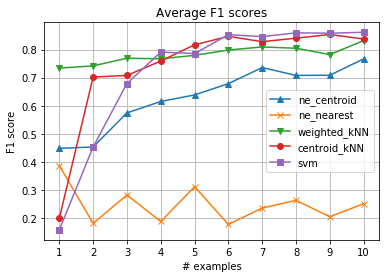

In [14]:
markers = ['^', 'x', 'v', 'o', 's']
fig = plt.figure()
i = 0
for model, f1_scores_list in f1_by_model.items():
    ax = plt.plot(N_EXAMPLES, f1_scores_list, marker=markers[i], label=model)
    i += 1
plt.grid()
plt.xticks(N_EXAMPLES)
plt.xlabel('# examples')
plt.ylabel('F1 score')
plt.legend()
plt.title('Average F1 scores')

### Print results